# <a id='toc1_'></a>[<span style="color:yellow;">Introduction to Fourier Transform</span>](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [<span style="color:yellow;">Introduction to Fourier Transform</span>](#toc1_)    
- [Step 1: Import Required Libraries](#toc2_)    
- [Step 2: 1D Signal Generation](#toc3_)    
  - [Step 2.1: Generate time array](#toc3_1_)    
  - [Step 2.2: Generate different 1D signals](#toc3_2_)    
    - [Step 2.2.1: Sine wave with 5Hz frequency](#toc3_2_1_)    
    - [Step 2.2.2: Square wave with 2Hz frequency](#toc3_2_2_)    
    - [💁💁💁 What is a `duty cycle`?](#toc3_2_3_)    
    - [Step 2.2.3: Sawtooth wave with 3Hz frequency](#toc3_2_4_)    
  - [Step 2.3: Combined signal (sum of all three)](#toc3_3_)    
  - [Step 2.4: Plot all signals](#toc3_4_)    
- [Step 3: 1D Fourier Transform](#toc4_)    
  - [Step 3.1: Understand key FFT concepts](#toc4_1_)    
  - [Step 3.2: Implement FFT calculation](#toc4_2_)    
  - [Step 3.3: Create a function to compute and plot FFT](#toc4_3_)    
  - [Step 3.4: Apply FFT to each signal](#toc4_4_)    
  - [Step 3.5: Analyze dominant frequencies](#toc4_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Step 1: Import Required Libraries](#toc0_)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fft2, ifft2, fftshift, ifftshift
from skimage import data
from skimage.transform import resize
import seaborn as sns

In [2]:
# The term "sawtooth" describes something 
# that has a shape or pattern 
# resembling the sharp, jagged teeth of a saw. 
# It is characterized by a series of rapid, steep rises 
# followed by sudden, steep drops (or vice versa), 
# creating a repeating, angular pattern.
from scipy.signal import square, sawtooth

<img src=Image/Saw.webp wid=250>

In [3]:
# Configure matplotlib for inline plotting
%matplotlib inline

In [4]:
# Set seaborn style for better visualization
sns.set_style("whitegrid")
print("Step 1: Libraries imported successfully!")

Step 1: Libraries imported successfully!


# <a id='toc3_'></a>[Step 2: 1D Signal Generation](#toc0_)

## <a id='toc3_1_'></a>[Step 2.1: Generate time array](#toc0_)

In [5]:
t = np.linspace(0, 1, 1000, endpoint=False)  # Time from 0 to 1 second, 1000 samples
print("\nStep 2.1: Time array created with", len(t), "samples")


Step 2.1: Time array created with 1000 samples


## <a id='toc3_2_'></a>[Step 2.2: Generate different 1D signals](#toc0_)

### <a id='toc3_2_1_'></a>[Step 2.2.1: Sine wave with 5Hz frequency](#toc0_)

A sine wave with frequency $f_1$, amplitude $\text{amp}_1$, and time t is given by: 
$$\text{sig\_sin}(t) = \text{amp}_1 \cdot \sin\left(2\pi f_1 t\right)$$
where:
- $f_1 = 5 \, \text{Hz}$ (frequency),
- $\text{amp}_1 = 1.0$ (amplitude).

In [6]:
f1, amp1 = 5, 1.0
sig_sin = amp1 * np.sin(2 * np.pi * f1 * t)

### <a id='toc3_2_2_'></a>[Step 2.2.2: Square wave with 2Hz frequency](#toc0_)

A square wave with frequency $f_2$, amplitude $\text{amp}_2$, and time $t$ is given by:
$$\text{sig\_sq}(t) = \text{amp}_2 \cdot \text{square}\left(2\pi f_2 t\right)$$
where:

- $\text{square}(x)$ is a square wave function (oscillates between $-1$ and 1 with 50% `duty cycle`), 
- $f_2 = 2 \, \text{Hz}$ (frequency),
- $\text{amp}_2 = 0.7$ (amplitude).

### <a id='toc3_2_3_'></a>[💁💁💁 What is a `duty cycle`?](#toc0_)
- Duty cycle: % of a wave’s cycle where the signal is "high" (on).
- Calculated: 
$$\left(\frac{\text{Duty Time (high state duration)}}{\text{Cycle Time (total period length)}}\right) × 100$$
- 50% = symmetric (equal high/low); <50% = more low time; >50% = more high time.
- Describes how long a signal stays active in one cycle.

In [7]:
f2, amp2 = 2, 0.7
sig_sq = amp2 * square(2 * np.pi * f2 * t)

### <a id='toc3_2_4_'></a>[Step 2.2.3: Sawtooth wave with 3Hz frequency](#toc0_)

A `sawtooth wave` with frequency $f_3$, amplitude $\text{amp}_3$, and time $t$ is given by:
$$\text{sig\_saw}(t) = \text{amp}_3 \cdot \text{sawtooth}\left(2\pi f_3 t\right)$$
where:
- $\text{sawtooth}(x)$ is a sawtooth wave function (rises linearly from $-1$ to 1 and drops sharply),
- $f_3 = 3 \, \text{Hz}$ (frequency),
- $\text{amp}_3 = 0.5$ (amplitude).

In [8]:
f3, amp3 = 3, 0.5
sig_saw = amp3 * sawtooth(2 * np.pi * f3 * t)

## <a id='toc3_3_'></a>[Step 2.3: Combined signal (sum of all three)](#toc0_)

The combined signal is the sum of the three individual signals:
$$\text{sig\_comb}(t) = \text{sig\_sin}(t) + \text{sig\_sq}(t) + \text{sig\_saw}(t)$$

In [9]:
sig_comb = sig_sin + sig_sq + sig_saw

In [10]:
# Print signal information
print(f"Generated signals: {f1}Hz sine, {f2}Hz square, {f3}Hz sawtooth")

Generated signals: 5Hz sine, 2Hz square, 3Hz sawtooth


## <a id='toc3_4_'></a>[Step 2.4: Plot all signals](#toc0_)

In [11]:
plt.ioff()
plt.figure(figsize=(6, 5))

<Figure size 600x500 with 0 Axes>

In [12]:
plt.subplot(4, 1, 1)
plt.plot(t, sig_sin)
plt.title("Sine Wave (5Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

In [13]:
plt.subplot(4, 1, 2)
plt.plot(t, sig_sq)
plt.title("Square Wave (2Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

In [14]:
plt.subplot(4, 1, 3)
plt.plot(t, sig_saw)
plt.title("Sawtooth Wave (3Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

In [15]:
plt.subplot(4, 1, 4)
plt.plot(t, sig_comb)
plt.title("Combined Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

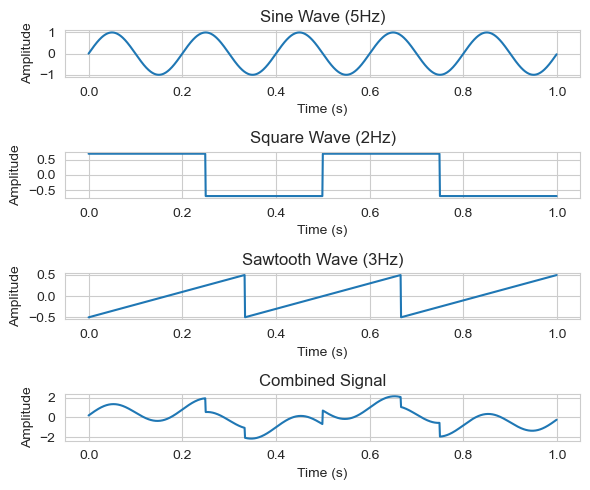

In [16]:
plt.tight_layout()
plt.show()

# <a id='toc4_'></a>[Step 3: 1D Fourier Transform](#toc0_)

For a signal $x(t)$, the `Fourier Transform` is defined as:
$$X(f) = \int_{-\infty}^{\infty} x(t) e^{-j2\pi ft} dt$$
For discrete signals, we use the `Discrete Fourier Transform (DFT)`, computed efficiently using the `Fast Fourier Transform (FFT)` algorithm.

## <a id='toc4_1_'></a>[Step 3.1: Understand key FFT concepts](#toc0_)

- Sampling Rate: Number of samples per second (1000 Hz in our case, since we have 1000 samples over 1 second)
- Nyquist Frequency: Half the sampling rate (500 Hz here), representing the maximum frequency we can detect
- Frequency Resolution: $\frac{\text{sampling rate}}{\text{number of samples}}$
- Magnitude Spectrum: Shows the amplitude of each frequency component

## <a id='toc4_2_'></a>[Step 3.2: Implement FFT calculation](#toc0_)

The steps to compute and visualize the FFT are:

1. Calculate the FFT of the signal
2. Determine the corresponding frequency axis
3. Compute the magnitude of the FFT (scaled appropriately)
4. Plot the magnitude spectrum

## <a id='toc4_3_'></a>[Step 3.3: Create a function to compute and plot FFT](#toc0_)

In [17]:
def plot_signal_and_spectrum(signal, t, sampling_rate, title, padding_factor=8):
    """
    Plot signal (time domain) and its FFT spectrum (frequency domain)
    Uses numpy.fft.fft, numpy.pad, and matplotlib subplots (all built-ins)
    """
    # Original signal length
    n_original = len(signal)
    
    # --- Improve frequency resolution with zero-padding (using numpy.pad) ---
    n_padded = n_original * padding_factor  # Total length after padding
    signal_padded = np.pad(signal, (0, n_padded - n_original), mode='constant')  # Zero-padding
    
    # --- Compute FFT (using numpy.fft.fft) ---
    yf = np.fft.fft(signal_padded)  # Built-in FFT function
    
    # --- Create frequency axis (using sampling properties) ---
    freq_step = sampling_rate / n_padded  # Frequency resolution (improved with padding)
    xf = np.arange(0, sampling_rate/2, freq_step)  # Frequencies up to Nyquist
    
    # --- Compute magnitude spectrum (scaled) ---
    yf_mag = 2.0 / n_original * np.abs(yf[:len(xf)])  # Scale by original signal length
    
    # --- Plot time and frequency domains side by side ---
    fig, (ax_time, ax_freq) = plt.subplots(1, 2, figsize=(12, 4))  # Subplots
    
    # Time domain plot
    ax_time.plot(t, signal)
    ax_time.set_title(f"Time Domain: {title}")
    ax_time.set_xlabel("Time (s)")
    ax_time.set_ylabel("Amplitude")
    ax_time.grid(True)
    
    # Frequency domain plot
    ax_freq.plot(xf, yf_mag, marker='o', markersize=3, linestyle='-', linewidth=0.5)
    ax_freq.set_title(f"Frequency Domain: {title}")
    ax_freq.set_xlabel("Frequency (Hz)")
    ax_freq.set_ylabel("Magnitude")
    ax_freq.set_xlim(0, 20)  # Focus on relevant frequencies
    ax_freq.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return xf, yf_mag

## <a id='toc4_4_'></a>[Step 3.4: Apply FFT to each signal](#toc0_)


Step 3: 1D Fourier Transforms (using built-in functions)...
Analyzing sine wave...


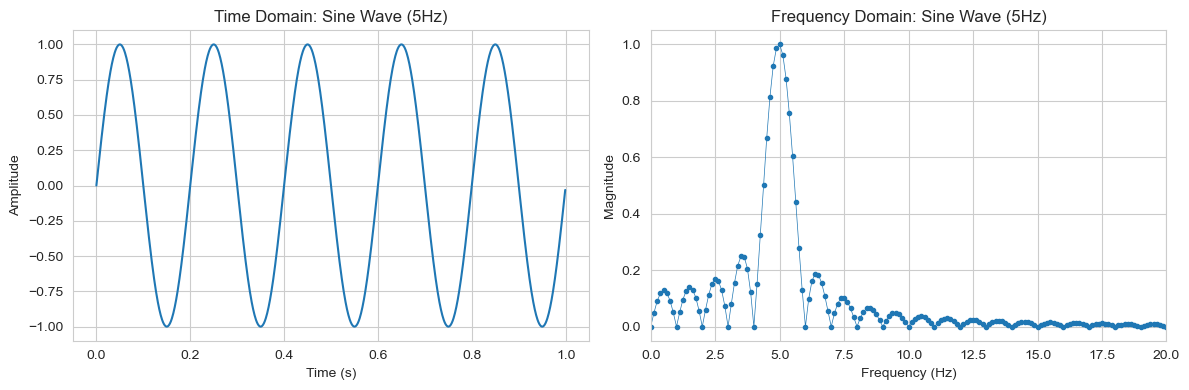

In [18]:
# Sampling rate (1000 samples/second, as defined earlier)
sampling_rate = 1000

print("\nStep 3: 1D Fourier Transforms (using built-in functions)...")

# 1. Sine Wave (5Hz)
print("Analyzing sine wave...")
xf_sin, yf_sin = plot_signal_and_spectrum(
    sig_sin, t, sampling_rate, 
    f"Sine Wave ({f1}Hz)", 
    padding_factor=8  # Higher = better resolution (via zero-padding)
)

Analyzing square wave...


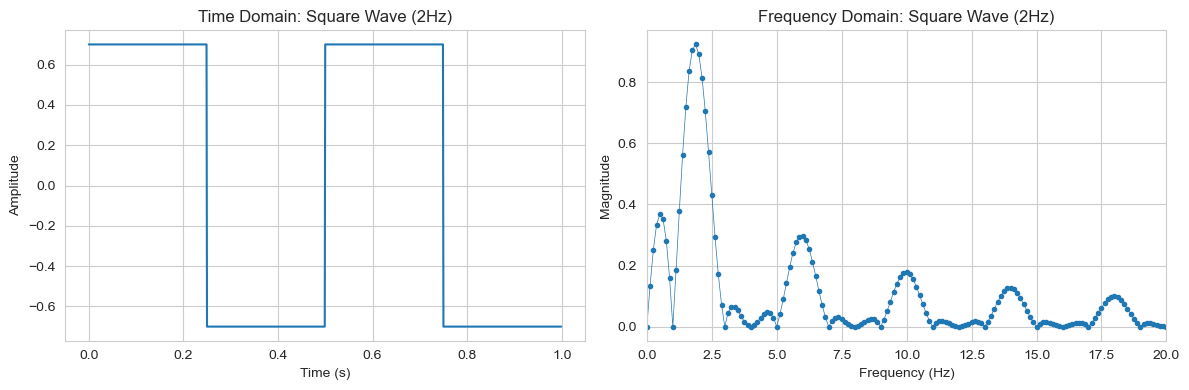

In [19]:
# 2. Square Wave (2Hz)
print("Analyzing square wave...")
xf_sq, yf_sq = plot_signal_and_spectrum(
    sig_sq, t, sampling_rate, 
    f"Square Wave ({f2}Hz)", 
    padding_factor=8
)

Analyzing sawtooth wave...


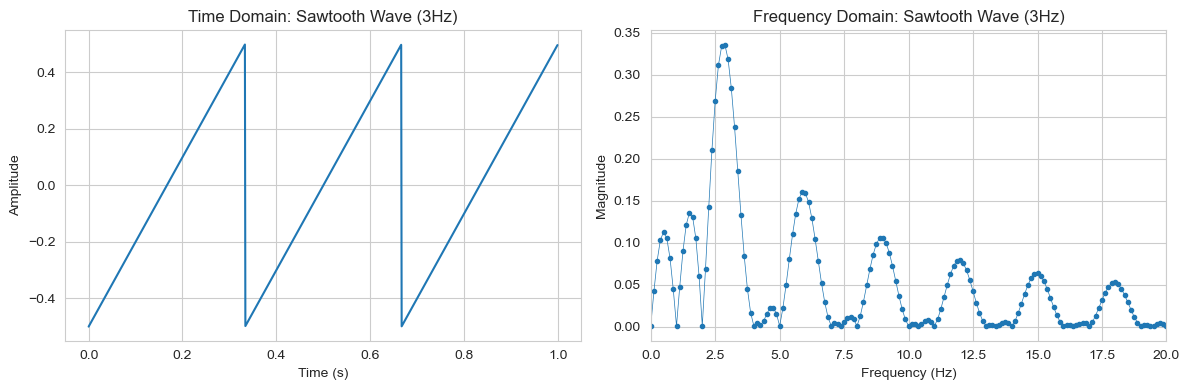

In [20]:
# 3. Sawtooth Wave (3Hz)
print("Analyzing sawtooth wave...")
xf_saw, yf_saw = plot_signal_and_spectrum(
    sig_saw, t, sampling_rate, 
    f"Sawtooth Wave ({f3}Hz)", 
    padding_factor=8
)

Analyzing combined signal...


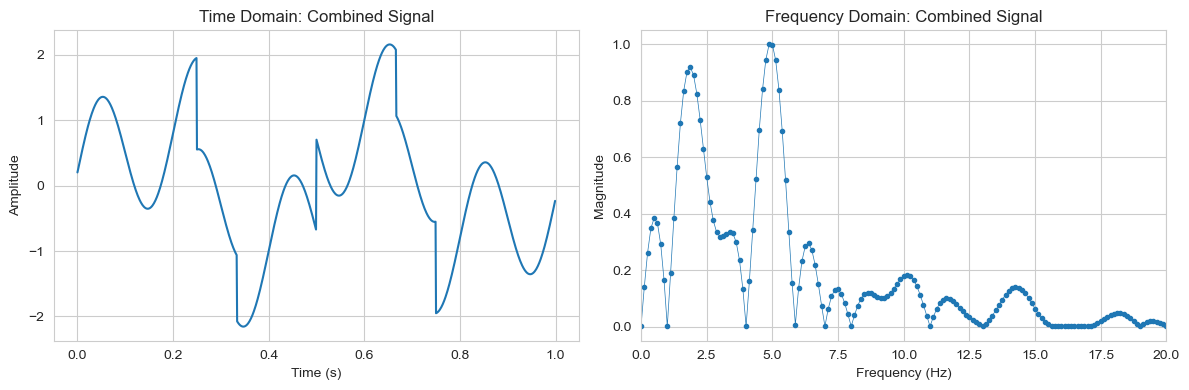

In [21]:
# 4. Combined Signal
print("Analyzing combined signal...")
xf_comb, yf_comb = plot_signal_and_spectrum(
    sig_comb, t, sampling_rate, 
    "Combined Signal", 
    padding_factor=8
)

## <a id='toc4_5_'></a>[Step 3.5: Analyze dominant frequencies](#toc0_)

In [22]:
# Show dominant frequencies for combined signal
print("\nDominant frequencies in combined signal:")
# Find indices of top 5 frequencies
top_indices = np.argsort(yf_comb)[-5:][::-1]
for i in top_indices:
    if xf_comb[i] > 0:  # Ignore DC component
        print(f"Frequency: {xf_comb[i]:.2f} Hz, Magnitude: {yf_comb[i]:.4f}")


Dominant frequencies in combined signal:
Frequency: 4.88 Hz, Magnitude: 0.9997
Frequency: 5.00 Hz, Magnitude: 0.9994
Frequency: 4.75 Hz, Magnitude: 0.9449
Frequency: 5.12 Hz, Magnitude: 0.9441
Frequency: 1.88 Hz, Magnitude: 0.9195
